In [238]:
import numpy as np

# Different arrangements of arrays

**Rasterio** is used to import/export raster data, including multi-band imagery. It structures its arrays in the following order: \[bands\]\[rows\]\[columns\]. This is the band sequential ordering.

**Scikit-learn (sklearn)** is used for machine learning and includes algorithms for image classification, among other things. It structures its arrays as 2-dimensional arrays in the following order: \[samples\]\[features\].  The first element of the array is equivalent to a pixel and the second element is the band number. A Scikit-learn array is of size: \[rows * columns\]\[bands\]. 

**matplotlib** is a visualization library. It expects multi-dimensional arrays to be structured yet a third way: \[rows\]\[columns\]\[bands\]. This is equivalent to a band-interleaved by pixel ordering.

---

If you read/write image data using **Rasterio** and...

...if you desire to apply machine learning algorithms to that image data using **Scikit-learn**, 

...and/or, if you desire to plot your data using **matplotlib**, then you will have to switch between array structures. 

This is a brief tutorial that shows you how to make these switches.

---

##### 1. Let's create an array that is equivalent to the array produced by Rasterio. We'll create a small Rasterio-style array with 3 bands, 4 rows and 5 columns. We'll create it in pieces to see the entire structure and all its values.

* First, create an image band (b1) with values 1 through 20

In [239]:
b1 = np.arange(1, 21, dtype=np.uint8).reshape(4,5)

In [240]:
b1

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]], dtype=uint8)

* Second, create 2 more bands (b2 and b3) that are multiples of the first band (b1).

In [241]:
b2, b3 = b1 * 5, b1 * 10

In [242]:
b2

array([[  5,  10,  15,  20,  25],
       [ 30,  35,  40,  45,  50],
       [ 55,  60,  65,  70,  75],
       [ 80,  85,  90,  95, 100]], dtype=uint8)

In [243]:
b3

array([[ 10,  20,  30,  40,  50],
       [ 60,  70,  80,  90, 100],
       [110, 120, 130, 140, 150],
       [160, 170, 180, 190, 200]], dtype=uint8)

* Third, create a multi-band array from b1, b2 and b3.

In [244]:
raster_like = np.array([b1, b2, b3])

In [245]:
raster_like

array([[[  1,   2,   3,   4,   5],
        [  6,   7,   8,   9,  10],
        [ 11,  12,  13,  14,  15],
        [ 16,  17,  18,  19,  20]],

       [[  5,  10,  15,  20,  25],
        [ 30,  35,  40,  45,  50],
        [ 55,  60,  65,  70,  75],
        [ 80,  85,  90,  95, 100]],

       [[ 10,  20,  30,  40,  50],
        [ 60,  70,  80,  90, 100],
        [110, 120, 130, 140, 150],
        [160, 170, 180, 190, 200]]], dtype=uint8)

In [246]:
raster_like.shape

(3, 4, 5)

##### There we go...an array with 3 bands, 4 rows and 5 columns. Since this is a small array we can see all the values and exactly where they are located in the array.

##### 2. Now we will rearrange the array to the structure required by Scikit-learn.

In [247]:
sklearn_like = raster_like.reshape(raster_like.shape[0], raster_like.shape[1]*raster_like.shape[2]).T

_Notes_
```
--reshape(num_bands, num_rows * num_cols)

--'.T' is equivalent to '.transpose()', both of which transpose the array.
```

In [248]:
sklearn_like

array([[  1,   5,  10],
       [  2,  10,  20],
       [  3,  15,  30],
       [  4,  20,  40],
       [  5,  25,  50],
       [  6,  30,  60],
       [  7,  35,  70],
       [  8,  40,  80],
       [  9,  45,  90],
       [ 10,  50, 100],
       [ 11,  55, 110],
       [ 12,  60, 120],
       [ 13,  65, 130],
       [ 14,  70, 140],
       [ 15,  75, 150],
       [ 16,  80, 160],
       [ 17,  85, 170],
       [ 18,  90, 180],
       [ 19,  95, 190],
       [ 20, 100, 200]], dtype=uint8)

In [249]:
sklearn_like.shape

(20, 3)

##### 3. Now let's go from an sklearn-like array back to a Rasterio-like array. It's easy.

In [263]:
raster_like2 = sklearn_like.T.reshape(raster_like.shape[0],raster_like.shape[1],raster_like.shape[2])

In [264]:
raster_like2

array([[[  1,   2,   3,   4,   5],
        [  6,   7,   8,   9,  10],
        [ 11,  12,  13,  14,  15],
        [ 16,  17,  18,  19,  20]],

       [[  5,  10,  15,  20,  25],
        [ 30,  35,  40,  45,  50],
        [ 55,  60,  65,  70,  75],
        [ 80,  85,  90,  95, 100]],

       [[ 10,  20,  30,  40,  50],
        [ 60,  70,  80,  90, 100],
        [110, 120, 130, 140, 150],
        [160, 170, 180, 190, 200]]], dtype=uint8)

In [265]:
raster_like

array([[[  1,   2,   3,   4,   5],
        [  6,   7,   8,   9,  10],
        [ 11,  12,  13,  14,  15],
        [ 16,  17,  18,  19,  20]],

       [[  5,  10,  15,  20,  25],
        [ 30,  35,  40,  45,  50],
        [ 55,  60,  65,  70,  75],
        [ 80,  85,  90,  95, 100]],

       [[ 10,  20,  30,  40,  50],
        [ 60,  70,  80,  90, 100],
        [110, 120, 130, 140, 150],
        [160, 170, 180, 190, 200]]], dtype=uint8)

#### 4. Now we'll transform from a Rasterio-like array to a matplotlib-like array. We'll use similar procedures to before.

In [266]:
raster_like

array([[[  1,   2,   3,   4,   5],
        [  6,   7,   8,   9,  10],
        [ 11,  12,  13,  14,  15],
        [ 16,  17,  18,  19,  20]],

       [[  5,  10,  15,  20,  25],
        [ 30,  35,  40,  45,  50],
        [ 55,  60,  65,  70,  75],
        [ 80,  85,  90,  95, 100]],

       [[ 10,  20,  30,  40,  50],
        [ 60,  70,  80,  90, 100],
        [110, 120, 130, 140, 150],
        [160, 170, 180, 190, 200]]], dtype=uint8)

In [267]:
matplotlib_like = np.transpose(raster_like, [1, 2, 0])

In [268]:
matplotlib_like.shape

(4, 5, 3)

In [270]:
matplotlib_like

array([[[  1,   5,  10],
        [  2,  10,  20],
        [  3,  15,  30],
        [  4,  20,  40],
        [  5,  25,  50]],

       [[  6,  30,  60],
        [  7,  35,  70],
        [  8,  40,  80],
        [  9,  45,  90],
        [ 10,  50, 100]],

       [[ 11,  55, 110],
        [ 12,  60, 120],
        [ 13,  65, 130],
        [ 14,  70, 140],
        [ 15,  75, 150]],

       [[ 16,  80, 160],
        [ 17,  85, 170],
        [ 18,  90, 180],
        [ 19,  95, 190],
        [ 20, 100, 200]]], dtype=uint8)

##### 5. Let's display this.

In [271]:
%matplotlib inline 
# for an interactive plot, use '%matplotlib notebook' instead of '%matplotlib inline'
import matplotlib
import matplotlib.pyplot as plt

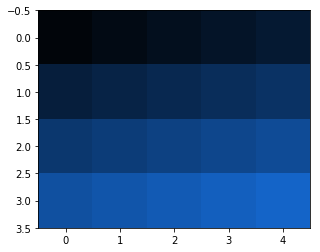

In [272]:
plt.imshow(matplotlib_like)

##### 6. Finally, let's go from a matplotlib-like array to a Rasterio-like array.

In [259]:
raster_like3 = np.transpose(matplotlib_like, [2, 0, 1])

In [260]:
raster_like3

array([[[  1,   2,   3,   4,   5],
        [  6,   7,   8,   9,  10],
        [ 11,  12,  13,  14,  15],
        [ 16,  17,  18,  19,  20]],

       [[  5,  10,  15,  20,  25],
        [ 30,  35,  40,  45,  50],
        [ 55,  60,  65,  70,  75],
        [ 80,  85,  90,  95, 100]],

       [[ 10,  20,  30,  40,  50],
        [ 60,  70,  80,  90, 100],
        [110, 120, 130, 140, 150],
        [160, 170, 180, 190, 200]]], dtype=uint8)

---
As you can see, our final array (raster_like3) is the same as our original array (raster_like)--we have been successful in all our transformations.  Now you can use **Rasterio**, **Scikit-learn** and **matplotlib** and be able to convert your image data from one structure to another.